In [82]:
# https://matplotlib.org/3.2.1/gallery/images_contours_and_fields/image_annotated_heatmap.html
import pandas as pd

import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime, date, timedelta

In [18]:
cs = ["2021-01-15 25", "2021-01-15 30", "2021-01-15 35", "2021-02-19 30",
              "2021-02-19 35", "2021-02-19 40", "2021-02-19 30"]
days = ["day1", "day2", "day3", "day4", "day5"]

openInterest = np.array([[0.8, 2.4, 2.5, 3.9, 0.0],
                    [2.4, 0.0, 4.0, 1.0, 0.5],
                    [1.1, 2.4, 0.8, 4.3, 4.5],
                    [0.6, 0.0, 0.3, 0.0, 0.5],
                    [0.7, 1.7, 0.6, 2.6, 3.5],
                    [1.3, 1.2, 0.0, 0.0, 0.5],
                    [0.1, 2.0, 0.0, 1.4, 0.0]])

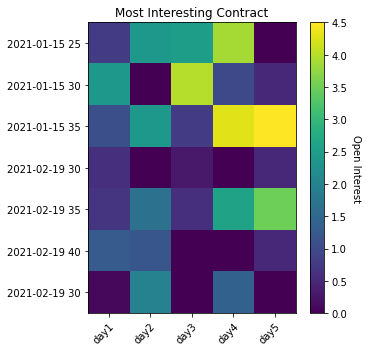

In [88]:
my_heatmap_plotter(days, cs, openInterest, figsize=(5,5))

In [85]:
%run ../interesting_options.py
%run -i ./my_heatmap_plotter.py
%who_ls

['add_z_score',
 'ax',
 'calculate_horizon_date',
 'calls1',
 'calls2',
 'calls3',
 'calls4',
 'calls5',
 'cbar',
 'concat_dfs',
 'cs',
 'date',
 'datetime',
 'datetime_valid',
 'days',
 'df1',
 'df2',
 'dfs',
 'fig',
 'filter_by_date',
 'filter_by_z_score',
 'harvest',
 'im',
 'interesting_options',
 'max_interest_by',
 'my_heatmap',
 'my_heatmap_plotter',
 'new',
 'np',
 'openInterest',
 'parse_contractSymbol',
 'pd',
 'plt',
 'timedelta']

In [89]:
# load calls option chains
calls1, calls2, calls3, calls4, calls5 = (
    pd.read_csv('~/Desktop/code/mamacita/algo2/csv/pltr/calls1.csv', index_col=0),
    pd.read_csv('~/Desktop/code/mamacita/algo2/csv/pltr/calls2.csv', index_col=0),
    pd.read_csv('~/Desktop/code/mamacita/algo2/csv/pltr/calls3.csv', index_col=0),
    pd.read_csv('~/Desktop/code/mamacita/algo2/csv/pltr/calls4.csv', index_col=0),
    pd.read_csv('~/Desktop/code/mamacita/algo2/csv/pltr/calls5.csv', index_col=0)
)

print('calls1', calls1.shape)
print('calls2', calls2.shape)
print('calls3', calls3.shape)
print('calls4', calls4.shape)
print('calls5', calls5.shape)

# filter for interesting options
calls1, calls2, calls3, calls4, calls5 = (
    interesting_options(calls1, time_horizon='max', z_score_let=2, rmold=True),
    interesting_options(calls2, time_horizon='max', z_score_let=2, rmold=True),
    interesting_options(calls3, time_horizon='max', z_score_let=2, rmold=True),
    interesting_options(calls4, time_horizon='max', z_score_let=2, rmold=True),
    interesting_options(calls5, time_horizon='max', z_score_let=2, rmold=True),

)
# calls1.loc[calls1['exp'] < date.today()]
print('calls1', calls1.shape)
print('calls2', calls2.shape)
print('calls3', calls3.shape)
print('calls4', calls4.shape)
print('calls5', calls5.shape)

calls1 (436, 20)
calls2 (387, 20)
calls3 (391, 20)
calls4 (389, 20)
calls5 (397, 20)
calls1 (19, 23)
calls2 (18, 23)
calls3 (20, 23)
calls4 (17, 23)
calls5 (25, 23)


In [40]:
calls1.head()


,contractSymbol,lastTradeDate,strike,lastPrice,bid,ask,change,percentChange,volume,openInterest,...,currency,undPriceAsk,undPriceBid,undPriceMid,undPriceLondonTime,undPriceTimestamp,mtime,exp,date_strike,openInterestZ
0,PLTR210129C00023500,2021-01-14 20:33:03,23.5,2.72,0.0,0.0,0.0,0.0,339.0,2163,...,USD,26.31,26.25,26.28,2021-01-15 11:51:03.797267,1.610711e+09,1.610712e+09,2021-01-29,2021-01-29 23.5,1.161851
1,PLTR210129C00024000,2021-01-14 20:59:34,24.0,2.36,0.0,0.0,0.0,0.0,460.0,2656,...,USD,26.31,26.25,26.28,2021-01-15 11:51:03.797267,1.610711e+09,1.610712e+09,2021-01-29,2021-01-29 24.0,1.558990
2,PLTR210129C00026500,2021-01-14 20:52:31,26.5,1.41,0.0,0.0,0.0,0.0,1253.0,3324,...,USD,26.31,26.25,26.28,2021-01-15 11:51:03.797267,1.610711e+09,1.610712e+09,2021-01-29,2021-01-29 26.5,2.097102
3,PLTR210129C00027500,2021-01-14 20:47:23,27.5,1.15,0.0,0.0,0.0,0.0,904.0,2244,...,USD,26.31,26.25,26.28,2021-01-15 11:51:03.797267,1.610711e+09,1.610712e+09,2021-01-29,2021-01-29 27.5,1.227101
4,PLTR210129C00035000,2021-01-14 20:26:26,35.0,0.27,0.0,0.0,0.0,0.0,637.0,3884,...,USD,26.31,26.25,26.28,2021-01-15 11:51:03.797267,1.610711e+09,1.610712e+09,2021-01-29,2021-01-29 35.0,2.548213


In [74]:
def concat_dfs(dfs, byindex=False, keycol='contractSymbol', valcol='openInterest', colnamepfx='day'):
    """
    Creates a 2D df where:
        1. columns correspond to observation days (for x axis).
        2. rows correspond to expirations/contract symbols (for y axis).
        3. values correspond to column data (for z axis/color)
    """
    def slice_dfs(dfs, keycol, valcol):
        out = []
        for i, df in enumerate(dfs):
            new_df = pd.DataFrame(df[valcol].values, 
                                  columns=[f'{colnamepfx}{i}'], # human readable format
                                  index=df.index if byindex is True else df[keycol]) # what's our index
            out.append(new_df)
        return out
   
    sliced = slice_dfs(dfs, keycol, valcol)
    out_df = pd.concat(sliced, axis=1)
    out_df.fillna(0, inplace=True)
    return out_df

In [104]:
dfs = concat_dfs([calls1, calls2, calls3, calls4, calls5])
len(dfs.index)

32

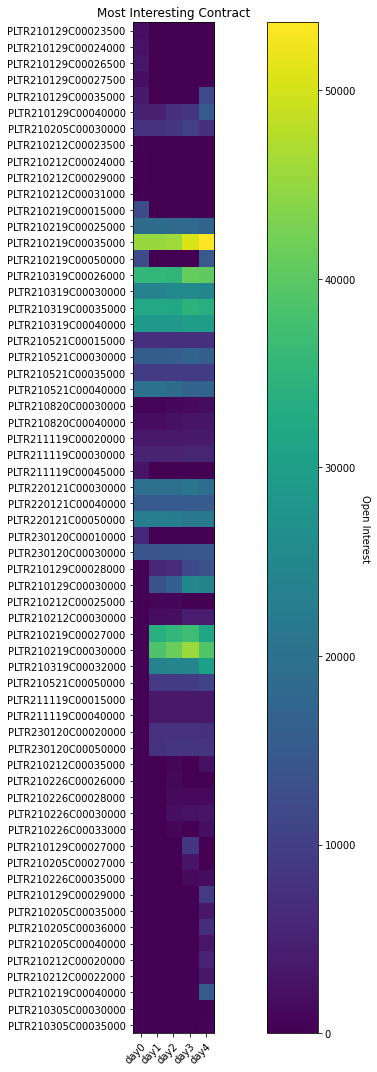

In [86]:
# ok
my_heatmap_plotter(dfs.columns, dfs.index, dfs.values, figsize=(15,15))

In [99]:
dfs1 = concat_dfs([calls1, calls2, calls3, calls4, calls5])
len(dfs1.index)

32

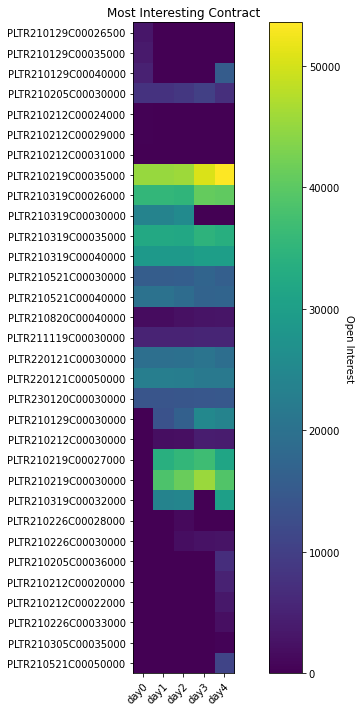

In [92]:
my_heatmap_plotter(dfs1.columns, dfs1.index, dfs1.values, figsize=(10,10))

In [ ]:
# TODO I need a better DataFrame - 3d df that holds days

In [94]:
# TODO I need a second heatmap - showin in percentages of 
# all displayed openInterest
dfs1.head()

,day0,day1,day2,day3,day4
PLTR210129C00026500,3324,0.0,0.0,0.0,0
PLTR210129C00035000,3884,0.0,0.0,0.0,0
PLTR210129C00040000,4840,0.0,0.0,0.0,15517
PLTR210205C00030000,7827,7827.0,8616.0,10253.0,7301
PLTR210212C00024000,236,0.0,0.0,0.0,0


In [103]:
dfs1.day0 = dfs1.day0 / dfs1.day0.sum()


1.0

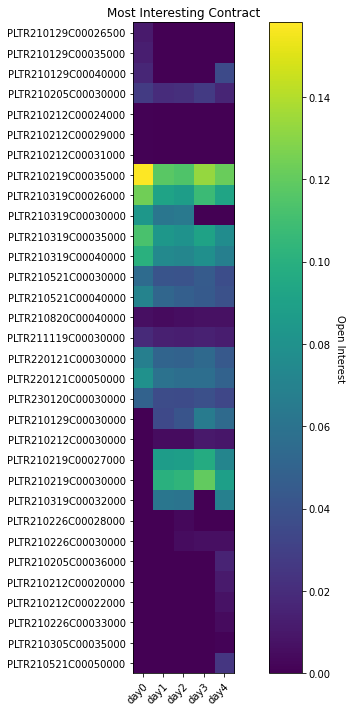

In [109]:
for col in dfs1.columns:
    dfs1[col] = dfs1[col] / dfs1[col].sum()
    
my_heatmap_plotter(dfs1.columns, dfs1.index, dfs1.values, figsize=(10,10))